In [11]:
import networkx as nx
from networkx.algorithms import bipartite 
print('networkx: %s' % nx.__version__)
import pandas
print('pandas: %s' % pandas.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
#sns.set_context('poster')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

import sklearn.cluster as cluster
import time
import numpy as np

networkx: 1.11
pandas: 0.20.1


In [4]:
df = pandas.read_csv('OriginalDatasetDS.csv', sep=',', header=None, error_bad_lines=False, 
                     warn_bad_lines=True, low_memory=False)
pandas.options.display.max_columns = 22

In [5]:
df.columns = ['Account Manager Identification Number','Customer Identification Number',
 'Innovative','Relationship Rating',
 'Visited Tech Center','ALPHA','BETA','PILOT','have they done pilot with us',
 'Improve occupancy via differentiation/positioning',
 'Increase rate/bed through add-on services','Increase 5-star rating',
 'Staff efficiency / lower cost of delivering care','Insurance costs',
 'Utilities costs','Health & Wellness Clinical Rehab',
 'Resident monitoring and saftey','Rehospitalization/ACo partnerships',
 'Care coordination across settings','Food & Nutirition', 
 'Telehealth and remote care delivery', 'Rural health and wellness', 'Pilots in Progress'] 
df.describe()

,Account Manager Identification Number,Customer Identification Number,Innovative,Relationship Rating,Visited Tech Center,ALPHA,BETA,PILOT,have they done pilot with us,Increase 5-star rating,Staff efficiency / lower cost of delivering care,Insurance costs,Resident monitoring and saftey,Rehospitalization/ACo partnerships,Food & Nutirition,Telehealth and remote care delivery,Rural health and wellness,Pilots in Progress
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0
mean,5.531250,79.500000,2.593750,3.293750,0.187500,0.325000,0.39375,0.543750,0.131250,1.600000,1.843750,0.825000,1.206250,0.737500,0.731250,0.262500,0.125000,0.0
std,3.776661,46.332134,1.299719,1.320362,0.391538,0.555702,0.55055,0.547687,0.421466,1.962542,1.421076,1.315366,1.887052,1.472975,1.511889,0.961442,0.641833,0.0
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,39.750000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4.000000,79.500000,3.000000,3.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,119.250000,4.000000,4.000000,0.000000,1.000000,1.00000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,13.000000,159.000000,5.000000,5.000000,1.000000,2.000000,2.00000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


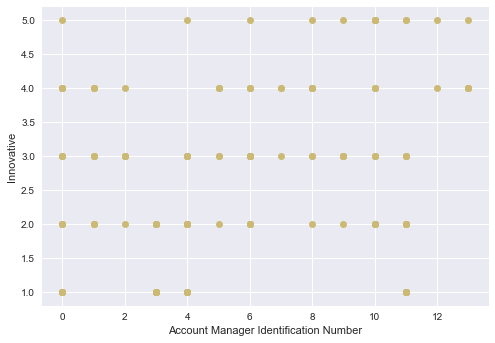

In [6]:
A = df.loc[:,'Account Manager Identification Number']
C = df.loc[:,'Innovative']

plt.plot(A, C,"yo")
plt.xlabel("Account Manager Identification Number")
plt.ylabel("Innovative")
plt.show()

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [15]:
#store data as matrix
df.head(23)
#df['column name'] = df['column name'].astype(np.int64)
cdf = df.apply(pandas.to_numeric, errors='coerce')
cdf = df.as_matrix()
cdf = cdf.astype(np.float64)
print(cdf)

ValueError: could not convert string to float: 'X'

In [9]:
#centroid based clustering
#k-means (loyds algorithm)
# assign data points to nearest cluster based on a distance metric
# calculate new centroids of clusters; repeat first step
# algorithm has converged when data points don't change cluster affiliations
plot_clusters(cdf,cluster.KMeans,(),{'n_clusters':1})

ValueError: could not convert string to float: 'X'